In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

数据集介绍：

Facebook数据已匿名化，将每个用户的Facebook内部ID替换为新值。此外，虽然提供了来自此数据集的特征向量，但对这些特征的解释已被模糊。例如，如果原始数据集可能包含“政治=民主党”特征，则新数据将仅包含“政治=匿名特征1”。因此，使用匿名数据可以确定两个用户是否具有相同的政治派别，但不能确定他们各自的政治派别代表什么。

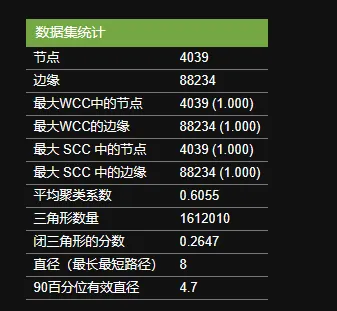

## 一：查看数据

In [2]:
facebook = pd.read_csv(
    r"D:\学习\图神经网络\facebook_combined.txt",
    sep=" ",
    names=["start_node", "end_node"],
    header=None,
)
# 打印前10条数据
print(facebook.head(10))

   start_node  end_node
0           0         1
1           0         2
2           0         3
3           0         4
4           0         5
5           0         6
6           0         7
7           0         8
8           0         9
9           0        10


In [3]:
# 打印后10条数据
print(facebook.tail(10))

       start_node  end_node
88224        4021      4030
88225        4023      4030
88226        4023      4031
88227        4023      4034
88228        4023      4038
88229        4026      4030
88230        4027      4031
88231        4027      4032
88232        4027      4038
88233        4031      4038


## 二：根据连接列表生成图

In [4]:
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

## 三：可视化图

如果我们清楚图是什么样的，我们可以定义节点的坐标，定义连边的粗细与权重成正比，定义节点的大小与节点的度成正比
但是对于facebook社交网络图，我们没有任何结构信息，因此使用random_layout函数，最简单的图的布局函数

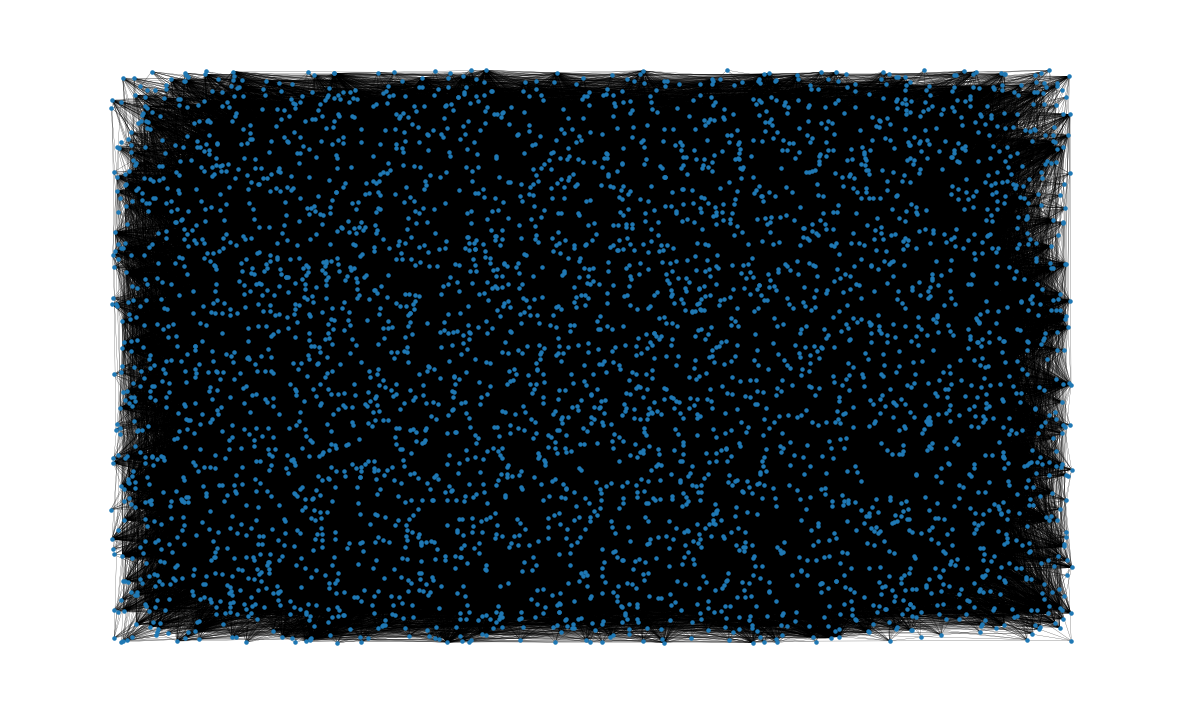

In [10]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")#关闭所有坐标轴线、刻度标记和标签
plot_options = {"node_size": 5, "with_labels": False, "width": 0.15}
nx.draw(G, pos=nx.random_layout(G), ax=ax, **plot_options)

如图：看不出任何结构，不是没有结构，而是结构没有排列好，因为节点排列有问题，太多边重叠混杂在一起
解决方法：使用spring_layout（）函数重新排列节点，此函数可以根据节点的连接结构计算节点的位置，但是对Facebook数据集，节点太多，计算很复杂，且耗时，设置迭代次数。

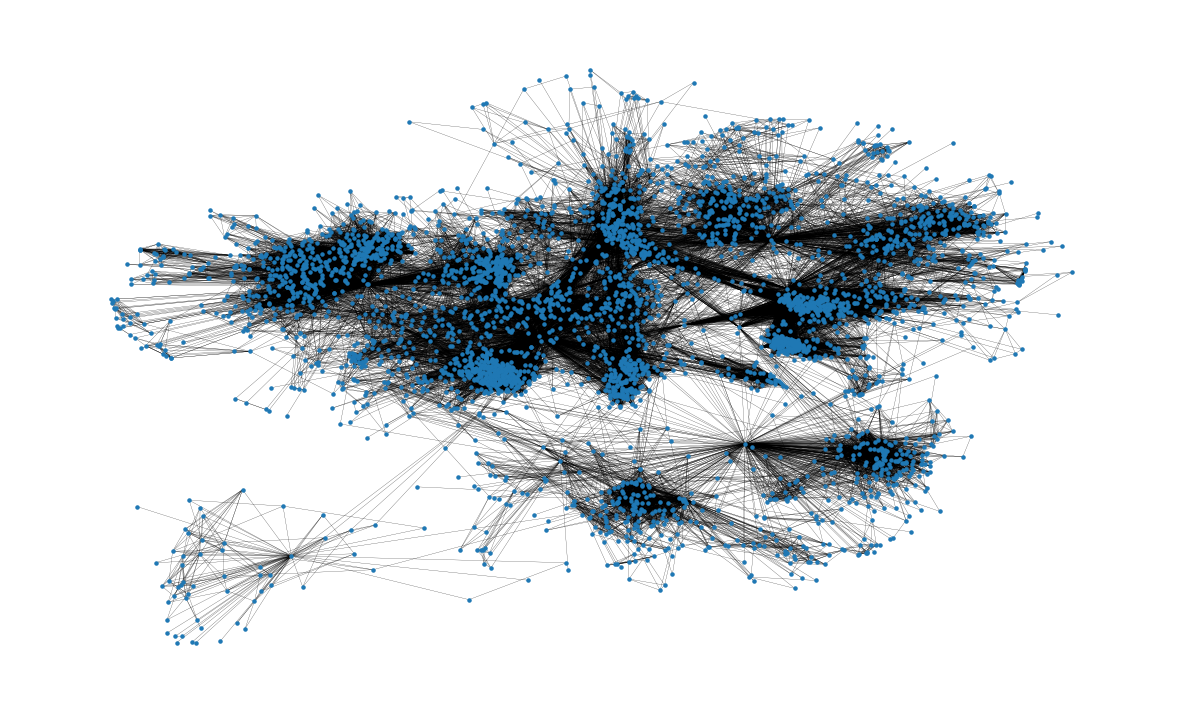

In [11]:
pos = nx.spring_layout(G, iterations=15, seed=2500)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

## 四：图的基本拓扑属性¶


In [12]:
#网络中的节点总数：
G.number_of_nodes()

4039

In [13]:
#边总数
G.number_of_edges()

88234

节点的平均程度。

一个节点平均连接44 个节点，一个人平均认识44个人。

通过创建节点所有度数的列表并用于查找所创建列表的平均值。numpy.array

In [14]:
G.degree()#输出为图的datafram数据，需将其转换为列表
d=list( G.degree())
np.mean(d,axis=0)#axis=0，对列求均值

array([2019.        ,   43.69101263])

In [15]:
# np.mean([d for _, d in G.degree()])

计算节点间的最短路径长度

有许多有趣的属性与通过图形的路径分布有关。

例如，图形的直径表示 将任何节点连接到图形中的另一个节点的最短路径。

类似地，平均路径长度给出了平均 要遍历的边以从网络中的一个节点到达另一个节点。 这些属性可以分别使用 nx.all_pairs_shortest_path_length和 nx.average_shortest_path_lengt函数进行计算。

但这些分析需要计算网络中的每一对节点的最短路径 ，计算量太大，对于网络中的所有节点，我们可以计算一次并重用 信息以节省计算时间。

nx.all_pairs_shortest_path_length返回一个字典的字典，该字典将节点映射到网络中的所有其他节点，其中最里面的映射返回 两个节点之间的最短路径的长度。 换句话说，将返回最短路径 任意两对节点之间的长度和：ushortest_path_lengths[u][v]uv

In [17]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))
shortest_path_lengths[0][42]  # Length of shortest path between nodes 0 and 42

1

图的直径：所有节点的最大离心率
节点i的离心率：节点i到其它任意节点的最大 d(i,j)（i，j节点的最短路径）

任意两个人之间的最短路径最大为8，最多经过7个人，两个人可互相认识。

六度空间理论：最多通过6个人可以认识认识任何一个陌生人。
（这里算的是7，但有个概率问题，后面可以看到需要7个人才认识的概率不足0.001.

In [18]:
nx.eccentricity(G, sp=shortest_path_lengths)

{0: 6,
 1: 7,
 2: 7,
 3: 7,
 4: 7,
 5: 7,
 6: 7,
 7: 7,
 8: 7,
 9: 7,
 10: 7,
 11: 7,
 12: 7,
 13: 7,
 14: 7,
 15: 7,
 16: 7,
 17: 7,
 18: 7,
 19: 7,
 20: 7,
 21: 7,
 22: 7,
 23: 7,
 24: 7,
 25: 7,
 26: 7,
 27: 7,
 28: 7,
 29: 7,
 30: 7,
 31: 7,
 32: 7,
 33: 7,
 34: 6,
 35: 7,
 36: 7,
 37: 7,
 38: 7,
 39: 7,
 40: 7,
 41: 7,
 42: 7,
 43: 7,
 44: 7,
 45: 7,
 46: 7,
 47: 7,
 48: 7,
 49: 7,
 50: 7,
 51: 7,
 52: 7,
 53: 7,
 54: 7,
 55: 7,
 56: 7,
 57: 7,
 58: 5,
 59: 7,
 60: 7,
 61: 7,
 62: 7,
 63: 7,
 64: 6,
 65: 7,
 66: 7,
 67: 7,
 68: 7,
 69: 7,
 70: 7,
 71: 7,
 72: 7,
 73: 7,
 74: 7,
 75: 7,
 76: 7,
 77: 7,
 78: 7,
 79: 7,
 80: 7,
 81: 7,
 82: 7,
 83: 7,
 84: 7,
 85: 7,
 86: 7,
 87: 7,
 88: 7,
 89: 7,
 90: 7,
 91: 7,
 92: 7,
 93: 7,
 94: 7,
 95: 7,
 96: 7,
 97: 7,
 98: 7,
 99: 7,
 100: 7,
 101: 7,
 102: 7,
 103: 7,
 104: 7,
 105: 7,
 106: 7,
 107: 5,
 108: 7,
 109: 7,
 110: 7,
 111: 7,
 112: 7,
 113: 7,
 114: 7,
 115: 7,
 116: 7,
 117: 7,
 118: 7,
 119: 6,
 120: 7,
 121: 7,
 122: 7,
 12

In [19]:
diameter = max(nx.eccentricity(G).values())
diameter

8

In [20]:
# nx.eccentricity(G)

计算全图平均最短路径并绘制平均最短路的分布图

In [21]:
# # Compute the average shortest path length for each node
# average_path_lengths = [
#     np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
# ]
# # The average over all nodes
# np.mean(average_path_lengths)

In [22]:
# 全图平均最短路径
aver_d=nx.average_shortest_path_length(G)
aver_d

3.6925068496963913

In [23]:
from collections import Counter

shortest_path_lengths为双键单值的字典类型

shortest_path_lengths.values()，ple 为字典的值类型，将其转为list，表中存放的是一个个字典

ple.value()为字典的值，将其转为list,list为一个个int

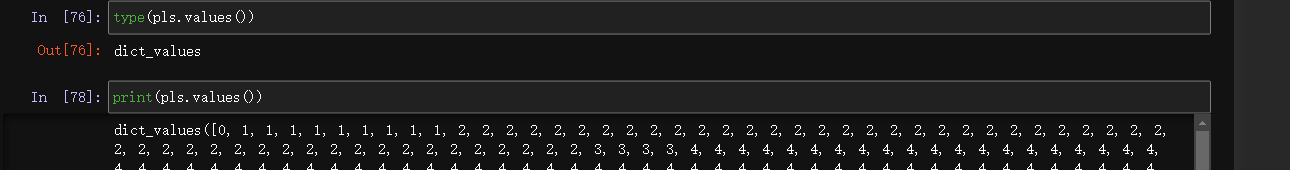

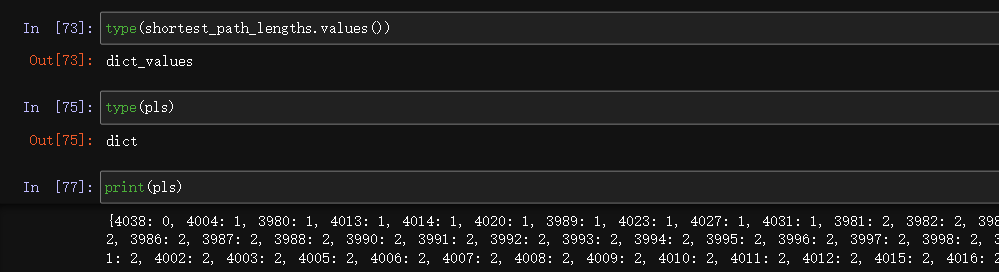

In [24]:
#创建一个空数组
path_lengths = np.zeros(diameter + 1, dtype=int)
for pls in shortest_path_lengths.values():
    Y1=list(pls.values())
    cou_l={}
    for i in range(1,9):
        cou_l[i]=Y1.count(i)
        path_lengths[i]+=cou_l[i]
path_lengths

array([      0,  176468, 2716134, 3981852, 5861560, 2565170,  677214,
        315464,   15620])

(0.0, 9.0)

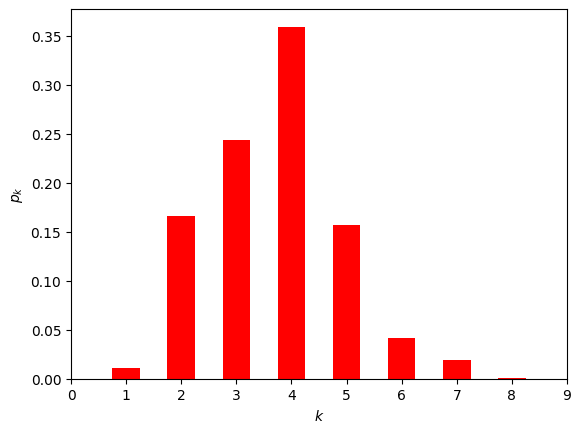

In [25]:

x=list(range(9))
y=[i/sum(path_lengths) for i in path_lengths]
# print (x)
# print (y)

plt.bar(x,y,width=0.5,color="red")
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.xlim([0,9])

此处计算图表的密度。显然，该图是一个非常稀疏的图表，如下所示：

In [26]:
nx.density(G)

0.010819963503439287

## 五：中心性度量

###  1：度中心度：
度中心性仅根据每个节点持有的邻居数分配重要性分数。

在此分析中，度中心性越高，该节点的邻居节点（facebook 朋友）就越多。

思想：度数越高，该节点就越重要

In [27]:
# degree_centrality = nx.centrality.degree_centrality(G) 
# # save results in a variable to use again 匿名函数
# (sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

In [28]:
degree_centrality = nx.centrality.degree_centrality(G)
# nx.centrality.degree_centrality(G)返回值为字典类型，键是节点序号，值为度中心性
#按度的大小降序输出所有的节点
def dict_sort_by_value(dict_input):
    '''
    输入字典，输出按值排序的字典
    '''
    return sorted(dict_input.items(),key=lambda x : x[1], reverse=True)   
(dict_sort_by_value(degree_centrality))[:8]
# sorted函数返回值为列表，排序数据是一个可迭代对象即可，不限制类型
#字典 items () 函数 以列表返回可遍历的 (键, 值) 元组数组，可以用于 for 来循环遍历； 
#items () 方法把字典中每对 key 和 value 组成一个元组，并把这些元组放在列表中返回。

[(107, 0.258791480931154),
 (1684, 0.1961367013372957),
 (1912, 0.18697374938088163),
 (3437, 0.13546310054482416),
 (0, 0.08593363051015354),
 (2543, 0.07280832095096582),
 (2347, 0.07206537890044576),
 (1888, 0.0629024269440317)]

绘制度中心性的分布：

plt.hist()：直方图，一种特殊的柱状图。
将统计值的范围分段，即将整个值的范围分成一系列间隔，然后计算每个间隔中有多少值。
直方图也可以被归一化以显示“相对”频率。 然后，它显示了属于几个类别中的每个类别的占比，其高度总和等于1。

Text(0, 0.5, 'Counts')

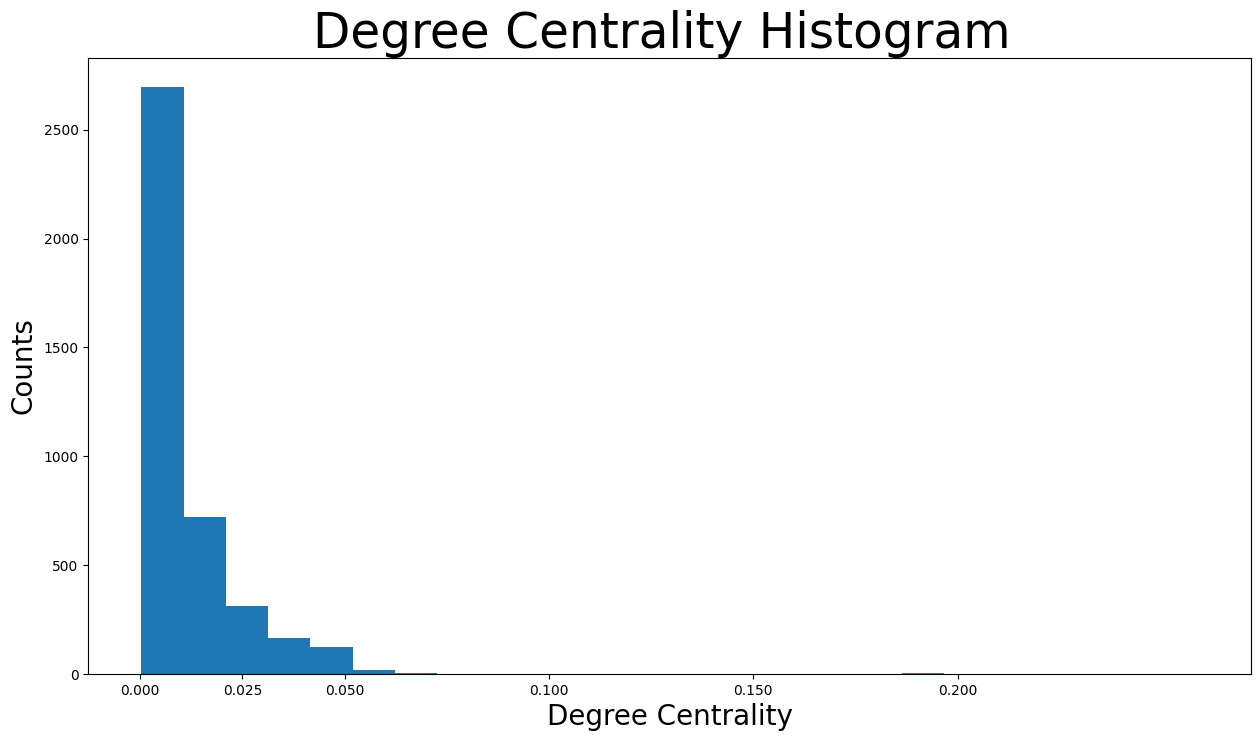

In [30]:
plt.figure(figsize=(15, 8))
plt.hist(degree_centrality.values(), bins=25)#分成25个区间，然后计算每个间隔中有多少值
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # 设置横坐标的标度
plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

可以看出，绝大多数Facebook用户的度中心性小于0.05。大多数人的比0.0125还低 .许多节点具有极低度的中心性，因为它们在这个网络中不连接（不认识）。


修改画图，调整节点的大小，度中心大的节点画大一些，突出

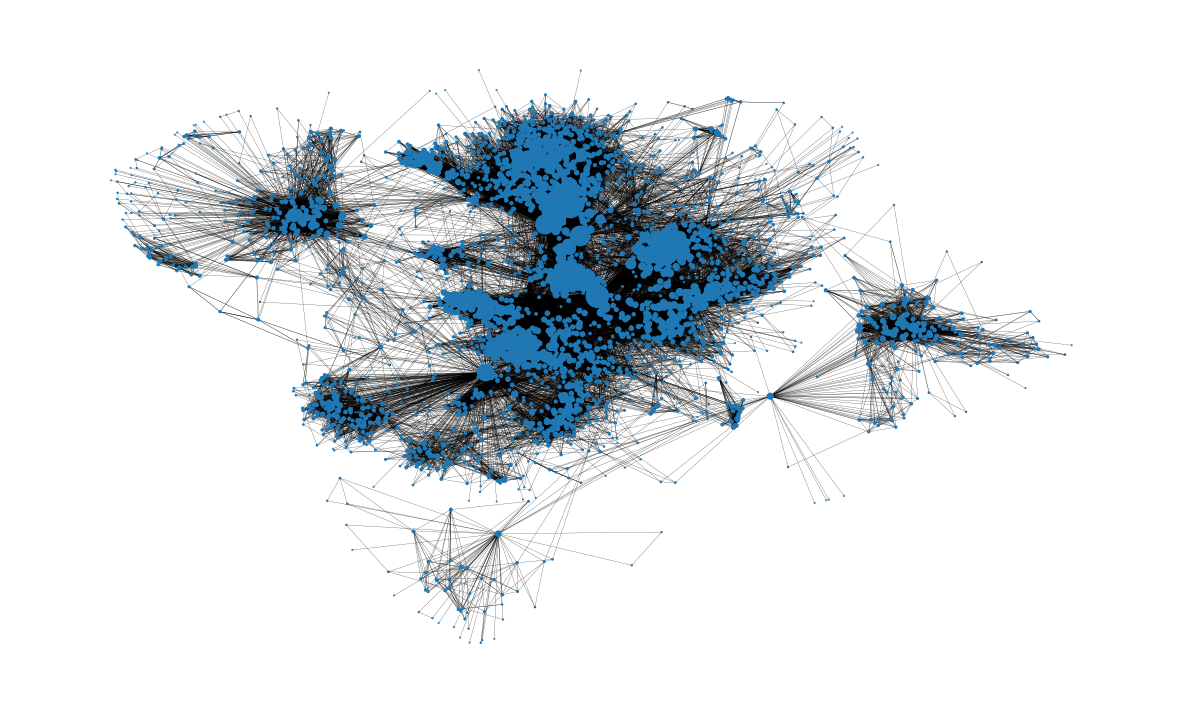

In [31]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
node_size = [ v * 1000 for v in degree_centrality.values()]  
# set up nodes size for a nice graph representation
#nx.draw_networkx(G, node_size=node_size,pos=pos, ax=ax, **plot_options)
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)

### 2:介数中心性

中介中心性衡量节点位于其他节点之间最短路径上的次数，这意味着它充当桥梁。

具体来说，在Facebook图表中，这一衡量标准与用户影响他人的能力有关。具有高中介中心性的用户充当许多非朋友用户的桥梁，因此能够通过传达信息（例如通过发布某些内容或分享帖子）来影响他们，甚至通过用户的圈子连接他们（这将减少用户的中介中心性之后）。

Text(0, 0.5, 'Counts')

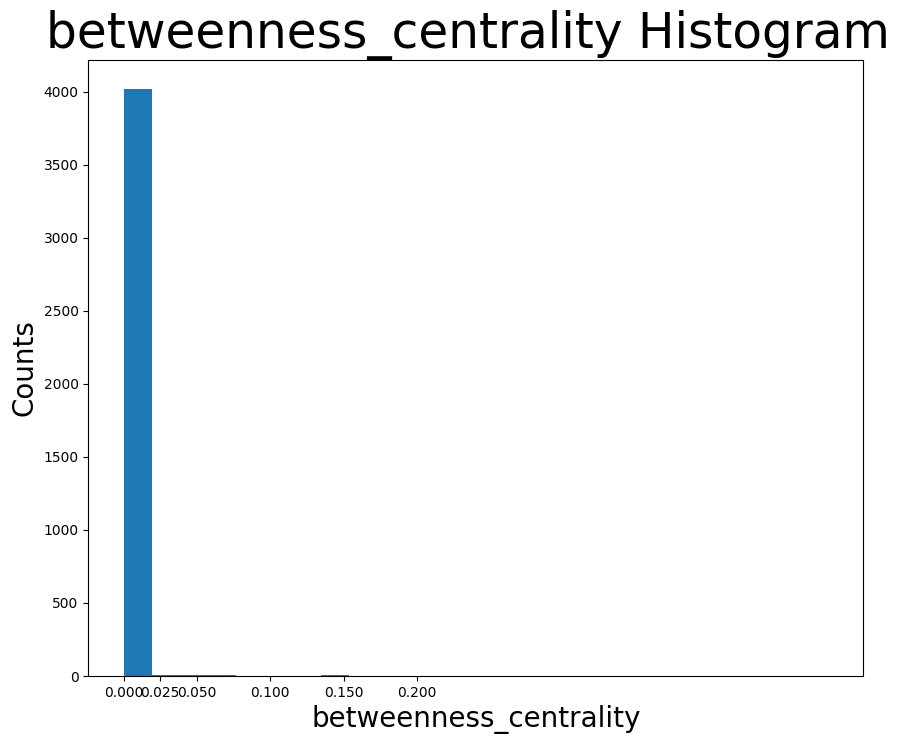

In [42]:
betweenness_centrality = nx.centrality.betweenness_centrality( G) 
#按度的大小降序输出前八个的点
def dict_sort_by_value(dict_input):
    '''
    输入字典，输出按值排序的字典
    '''
    return sorted(dict_input.items(),key=lambda x : x[1], reverse=True)   
(dict_sort_by_value(betweenness_centrality))[:8]
#介数中心度直方图
plt.figure(figsize=(10, 8))
plt.hist(betweenness_centrality.values(), bins=25) #分成25个区间，然后计算每个间隔中有多少值
plt.xticks(ticks=[0, 0.025,0.05, 0.1, 0.15,0.2 ] )# set the x axis ticks 设置横坐标的取值
plt.title("betweenness_centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("betweenness_centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})


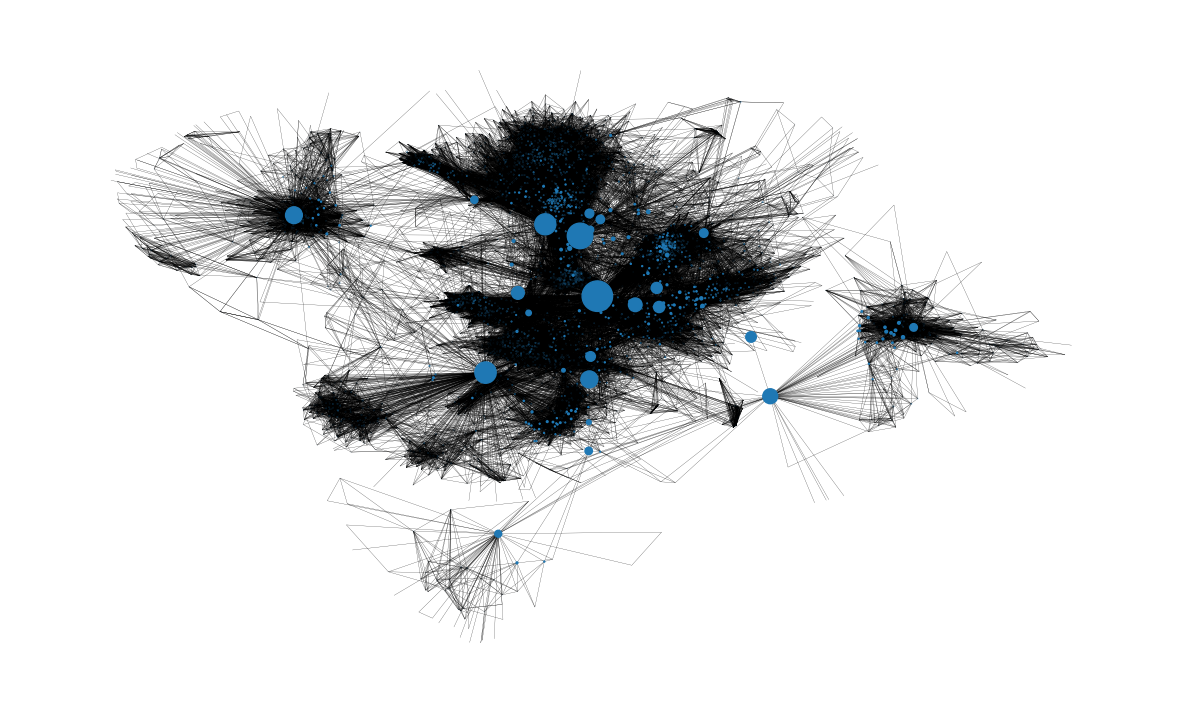

In [110]:
#突出介数中心度大的节点
#突出的点为桥梁，两个社区间的连接者
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
node_size = [ v * 1000 for v in betweenness_centrality.values()]  
# set up nodes size for a nice graph representation
#nx.draw_networkx(G, node_size=node_size,pos=pos, ax=ax, **plot_options)
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)

### 3:接近中心度

In [111]:
closeness_centrality = nx.centrality.closeness_centrality( G) 
#按度的大小降序输出前八个的点
def dict_sort_by_value(dict_input):
    '''
    输入字典，输出按值排序的字典
    '''
    return sorted(dict_input.items(),key=lambda x : x[1], reverse=True)   
(dict_sort_by_value(closeness_centrality))[:8]


[(107, 0.45969945355191255),
 (58, 0.3974018305284913),
 (428, 0.3948371956585509),
 (563, 0.3939127889961955),
 (1684, 0.39360561458231796),
 (171, 0.37049270575282134),
 (348, 0.36991572004397216),
 (483, 0.3698479575013739)]

Text(0, 0.5, 'Counts')

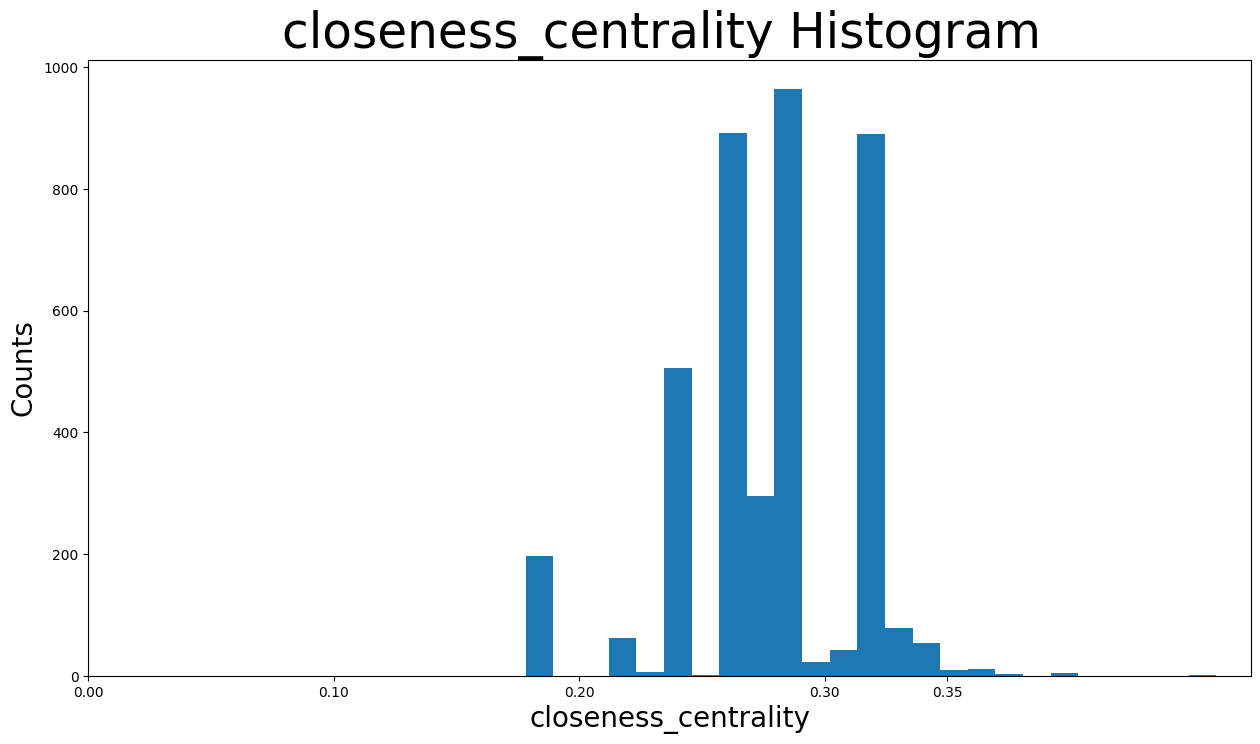

In [113]:
#介数中心度直方图
plt.figure(figsize=(15, 8))
plt.hist(closeness_centrality.values(), bins=25)#分成25个区间，然后计算每个间隔中有多少值
plt.xticks(ticks=[0, 0.1,  0.2,0.3,0.35])  # set the x axis ticks 设置横坐标的取值
plt.title("closeness_centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("closeness_centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

接近中心性根据每个节点与网络中所有其他节点的“接近度”对每个节点进行评分。对于一个节点，它的接近中心性测量到所有其他节点的平均远度。换句话说，的紧密中心性越高，它离网络中心越近。

接近中心性度量对于监控虚假信息（例如假新闻）或病毒（例如在这种情况下获得Facebook帐户控制权的恶意链接）的传播非常重要。让我们来看看假新闻的例子。如果具有最高接近中心性度量的用户开始传播一些假新闻信息（共享或创建帖子），整个网络将尽快获得错误信息。但是，如果具有非常低的接近中心性的用户会尝试相同的方法，则错误信息向整个网络的传播速度会慢得多。这是因为虚假信息必须首先到达具有高度接近中心性的用户，然后将其传播到网络的许多不同部分。

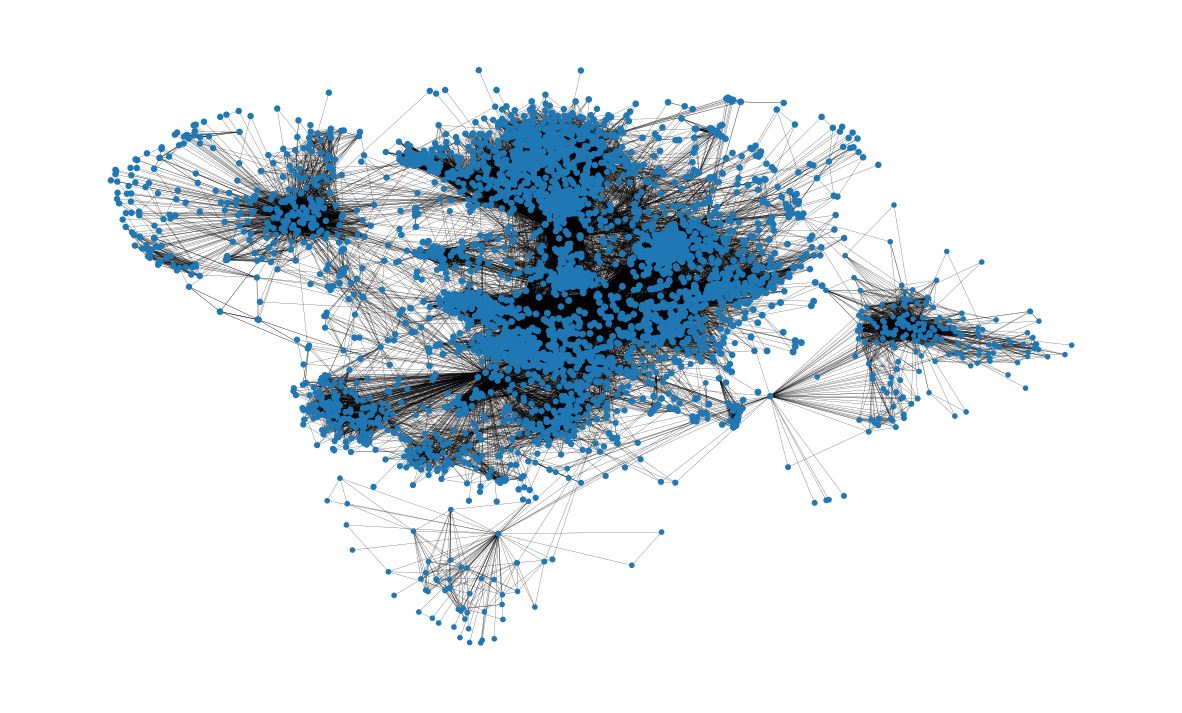

In [115]:
#突出接近中心度大的节点
#突出的点为桥梁，两个社区间的连接者
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
node_size = [ v * 50 for v in closeness_centrality.values()]  
# set up nodes size for a nice graph representation
#nx.draw_networkx(G, node_size=node_size,pos=pos, ax=ax, **plot_options)
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)

### 4:特征向量中心度

特征向量中心性是显示节点与网络中其他重要节点的连接程度的指标。它根据节点在网络内的连接程度以及其连接有多少链接等来衡量节点的影响力。该度量可以识别对整个网络影响最大的节点。

高特征向量中心性意味着节点连接到本身具有高特征向量中心性的其他节点。在此Facebook分析中，该度量与用户影响整个图的能力相关联，因此具有最高特征向量中心性的用户是该网络中最重要的节点。

In [117]:
eigenvector_centrality = nx.centrality.eigenvector_centrality( G) 
#按度的大小降序输出前八个的点
def dict_sort_by_value(dict_input):
    '''
    输入字典，输出按值排序的字典
    '''
    return sorted(dict_input.items(),key=lambda x : x[1], reverse=True)   
(dict_sort_by_value(eigenvector_centrality))[:8]

[(1912, 0.09540696149067629),
 (2266, 0.08698327767886552),
 (2206, 0.08605239270584342),
 (2233, 0.08517340912756598),
 (2464, 0.08427877475676092),
 (2142, 0.08419311897991796),
 (2218, 0.0841557356805503),
 (2078, 0.08413617041724979)]

Text(0, 0.5, 'Counts')

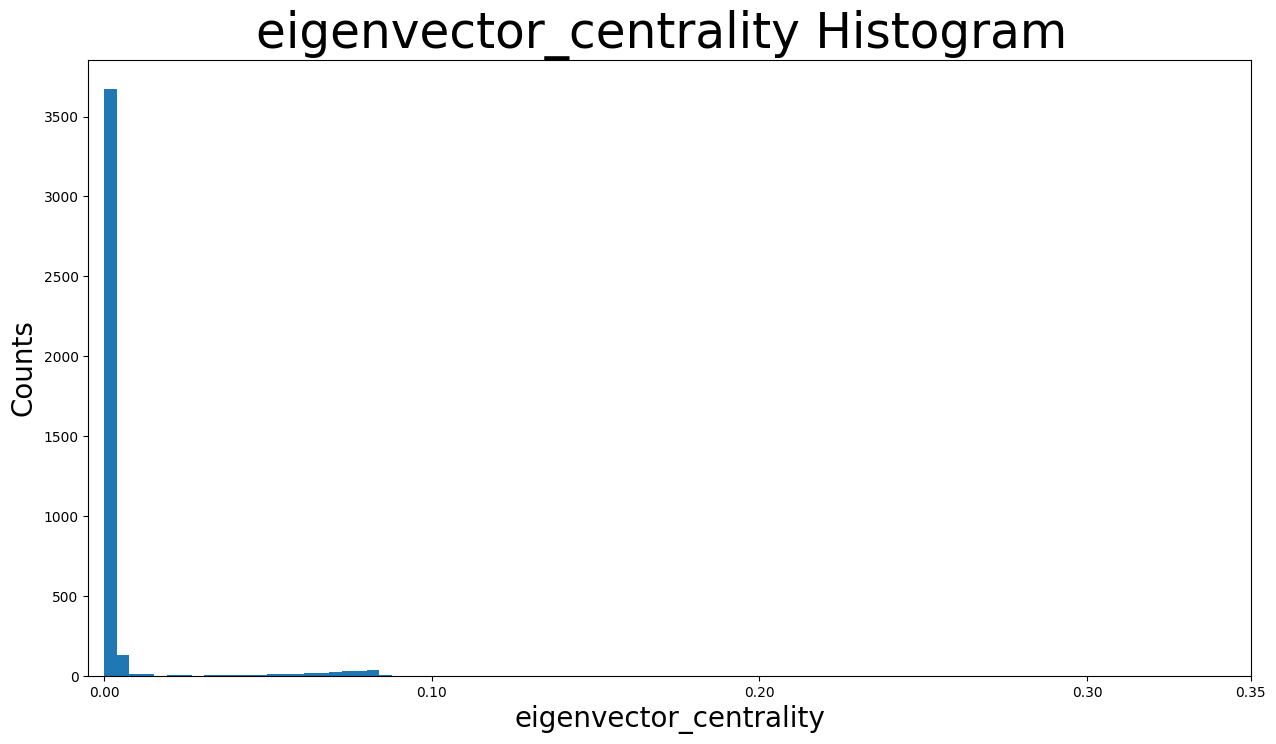

In [118]:
#特征向量中心度直方图
plt.figure(figsize=(15, 8))
plt.hist(eigenvector_centrality.values(), bins=25)#分成25个区间，然后计算每个间隔中有多少值
plt.xticks(ticks=[0, 0.1,  0.2,0.3,0.35])  # set the x axis ticks 设置横坐标的取值
plt.title("eigenvector_centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("eigenvector_centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

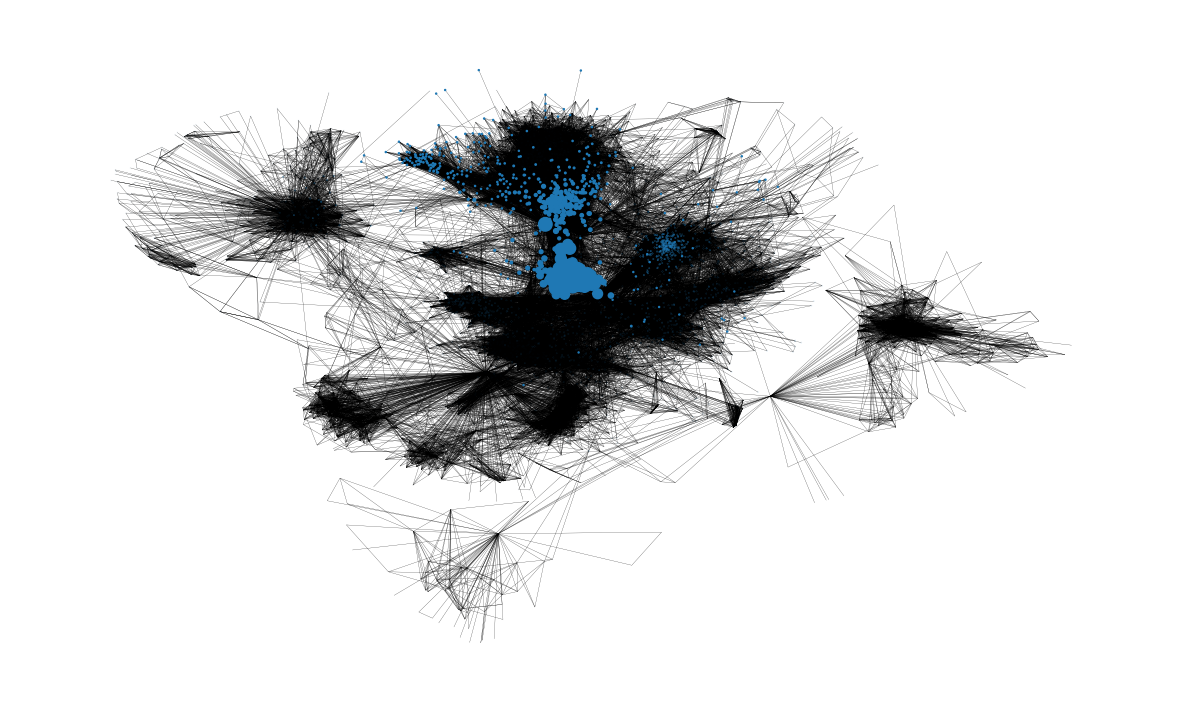

In [119]:
#突出特征向量中心度大的节点
#特征向量中心度大的点有很多高声望的点连接到它
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
node_size = [ v * 1000 for v in eigenvector_centrality.values()]  
# set up nodes size for a nice graph representation
#nx.draw_networkx(G, node_size=node_size,pos=pos, ax=ax, **plot_options)
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)

## 六：网络社区

社区是一组节点，组内的节点连接的边比组之间的连接多得多。

下面使用两种不同的算法进行社区检测

### 1：半同步标签传播方法对群落进行检测;

此功能自行确定将检测到的社区数。现在，将迭代社区，并创建一个颜色列表，以包含属于同一社区的节点的相同颜色。此外，还打印了社区数量：

In [43]:
colors = ["" for x in range(G.number_of_nodes())]  # initialize colors list
counter = 0
for com in nx.community.label_propagation_communities(G):
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    counter += 1
    for node in list(
        com
    ):  # fill colors list with the particular color for the community nodes
        colors[node] = color
counter

44

共发现44个社区

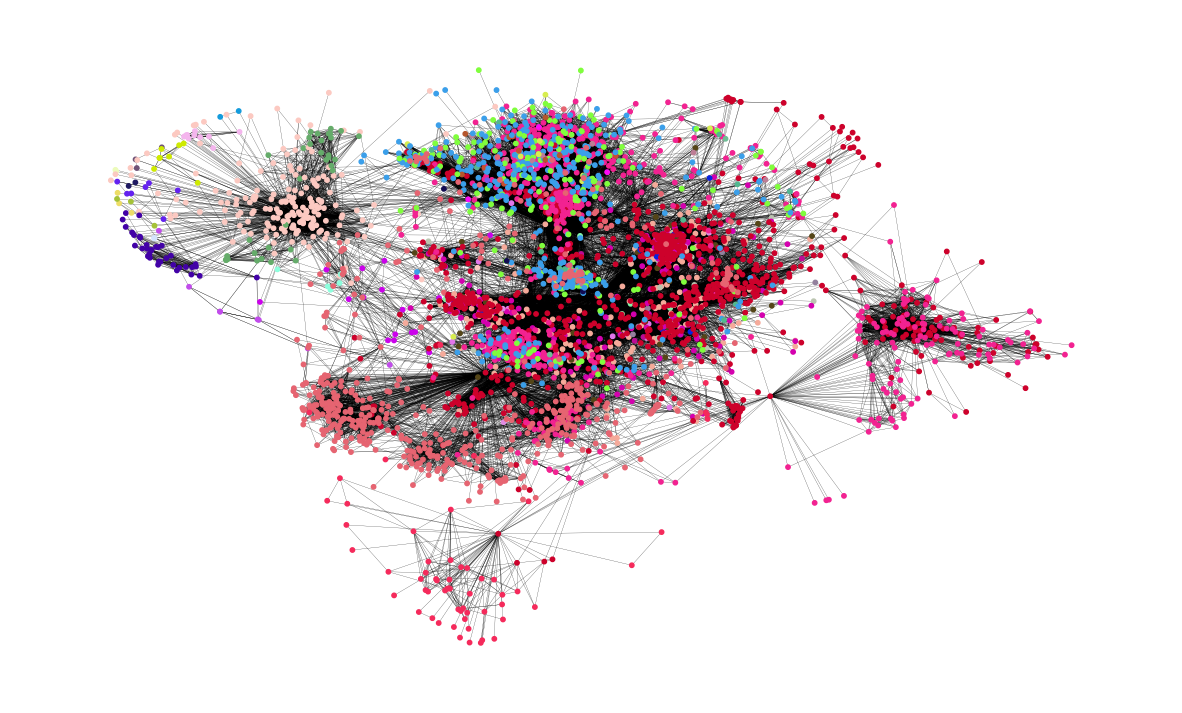

In [44]:
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    G, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors
)

### 2:异步流体群落算法

此算法我们可以决定要检测的社区数量。假设共有8个社区，同样，将迭代社区，并创建一个颜色列表，以包含属于同一社区的节点的相同颜色。

In [45]:
colors = ["" for x in range(G.number_of_nodes())]
for com in nx.community.asyn_fluidc(G, 8, seed=0):
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    for node in list(com):
        colors[node] = color

现在，社区显示在图中。同样，每个社区都用不同的颜色描绘

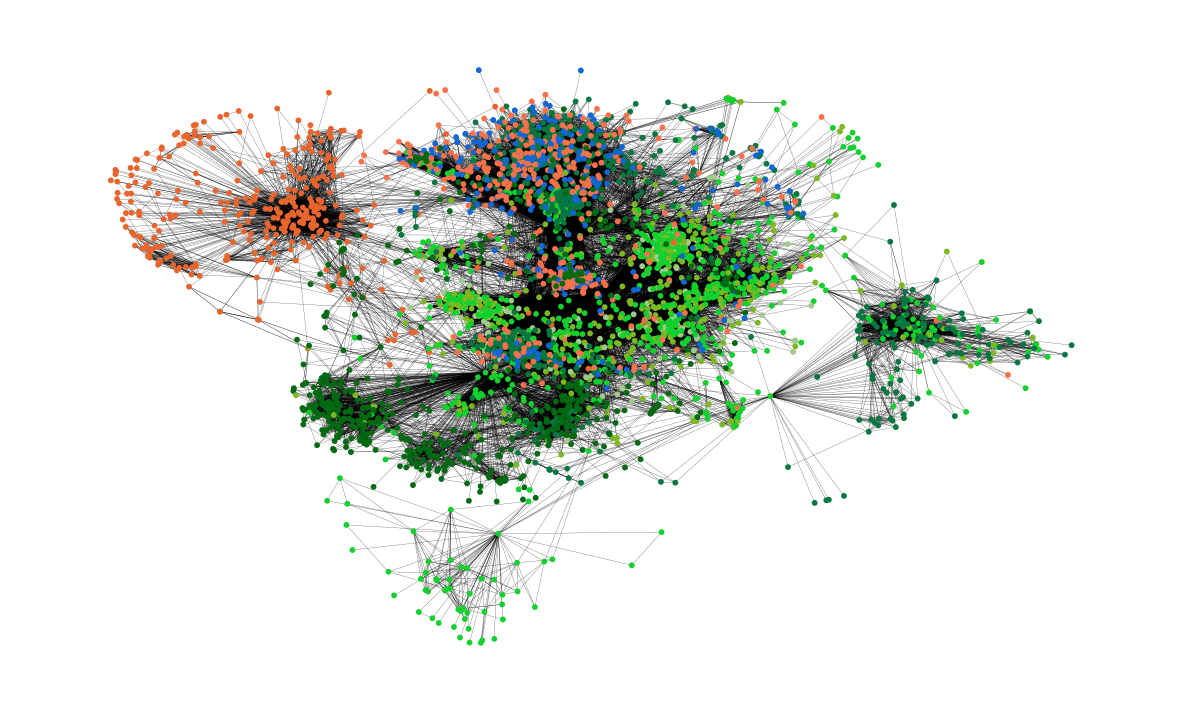

In [46]:
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    G, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors
)

七：补充 python_matplotlib改变横坐标和纵坐标上的刻度(ticks)


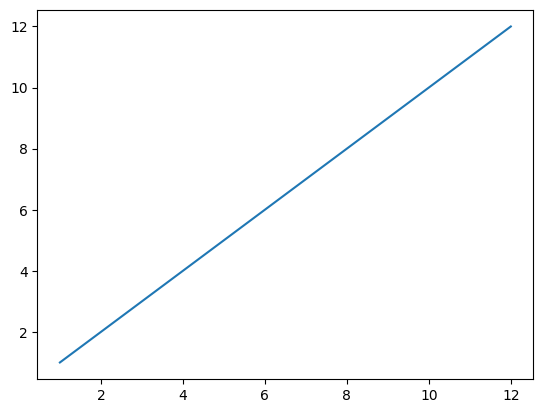

In [101]:
#不用trick的效果
import numpy as np
import matplotlib.pyplot as plt
import calendar
x = range(1,13,1)
y = range(1,13,1)
plt.plot(x,y)
plt.show()

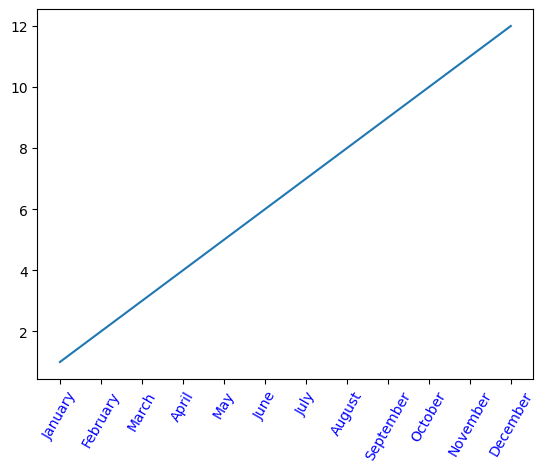

In [102]:
#用trick的效果
import numpy as np
import matplotlib.pyplot as plt
import calendar
x = range(1,13,1)
y = range(1,13,1)
plt.plot(x,y)
plt.xticks(x, calendar.month_name[1:13],color='blue',rotation=60) 
#参数x空值X轴的间隔，第二个参数控制每个间隔显示的文本，后面两个参数控制标签的颜色和旋转角度
plt.show()